## Assignment 2 - Developing an Automatic Recording Unit (ARU) with a Raspberry Pi


### Emmanuel NYANDU KAGARABI

In [1]:
# You might need to restart the runtime after running this code. You'll only
# have to do this once per runtime. Once you restart, you do not need to run this again
!git clone https://github.com/scikit-maad/scikit-maad.git

Cloning into 'scikit-maad'...
remote: Enumerating objects: 10604, done.
remote: Counting objects: 100% (1337/1337), done.
remote: Compressing objects: 100% (537/537), done.
remote: Total 10604 (delta 802), reused 1209 (delta 752), pack-reused 9267
Receiving objects: 100% (10604/10604), 183.25 MiB | 21.63 MiB/s, done.
Resolving deltas: 100% (7747/7747), done.
Updating files: 100% (267/267), done.


In [2]:
# !pip install librosa==0.8.1
!pip install scikit-maad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00


In [3]:
!pip install -U librosa
!pip freeze | grep librosa

librosa==0.10.1


In [4]:
colab = True

In [5]:
!pip install SoundFile
from google.colab import drive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile

In [6]:
# Google Authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
 # Download files
downloaded = drive.CreateFile({'id':"1js1fz4Bu98NIds4cErL7NdT1efxavixp"})
downloaded.GetContentFile('Code.zip')

# Extract files to temporary location in Google Drive
with zipfile.ZipFile('Code.zip', 'r') as zip_file:
     zip_file.extractall()

# Download files
downloaded = drive.CreateFile({'id':"1ZtnBNlAttwSqiYF4XPfNLE6YX5H8HDAa"})
downloaded.GetContentFile('Data.zip')

# Extract files to temporary location in Google Drive
with zipfile.ZipFile('Data.zip', 'r') as zip_file:
    zip_file.extractall()

In [8]:
# Do not delete these imports [ 0 marks]
from Preprocessing import *
import librosa
import numpy as np
import random


#We define the two classes
positive_class = ['1']#this corresponds to labels which reprsent present of bird sound
negative_class =['0']#the second case

#Data hyper-parameters
f_max = 15000
f_min = 150
n_fft = 1024 # Hann window length
hop_length = 256 # Sepctrogram hop size
n_mels = 128
#
lowpass_cutoff = 10000 # We take less than nuquist_rate
nyquist_rate = 11025 #Nyquist rqte
downsample_rate = 22050 #Frequence to downsqmple
segment_duration = 3 #

# -----------------------------
species_folder = '.' # Should contain /Audio and /Annotations, don't change this
file_type = 'svl' # don't change this
audio_extension = '.wav' # don't change this

In [9]:
pre_pro = Preprocessing(species_folder, lowpass_cutoff,
                downsample_rate, nyquist_rate,
                segment_duration,
                positive_class, negative_class,n_fft,
                hop_length, n_mels, f_min, f_max, file_type,
                audio_extension)

X,Y = pre_pro.create_dataset(False)

pre_pro.save_data_to_pickle(X,Y)

print("Done")

Processing: 19_19_fermat_15
Found file
Filtering...
Downsampling...
19_19_fermat_15
Reading annotations...
Processing: 23_2-2-2024=20_53_19
Found file
Filtering...
Downsampling...
23_2-2-2024=20_53_19
Reading annotations...
Processing: 6_2-2-2024=14_46_17
Found file
Filtering...
Downsampling...
6_2-2-2024=14_46_17
Reading annotations...
Processing: 9_2-2-2024=21_1_26
Found file
Filtering...
Downsampling...
9_2-2-2024=21_1_26
Reading annotations...
Processing: 6_2-2-2024=14_43_57
Found file
Filtering...
Downsampling...
6_2-2-2024=14_43_57
Reading annotations...
Processing: 23_2-2-2024=20_39_55
Found file
Filtering...
Downsampling...
23_2-2-2024=20_39_55
Reading annotations...
Processing: 15_audio_34
Found file
Filtering...
Downsampling...
15_audio_34
Reading annotations...
Processing: 15_audio_79
Found file
Filtering...
Downsampling...
15_audio_79
Reading annotations...
Processing: 8_emmanuel_5
Found file
Filtering...
Downsampling...
8_emmanuel_5
Reading annotations...
Processing: 23_2-

## Step 1: Pre-process the data

## Data shapes

In [10]:
print(X.shape)
print(Y.shape)

(1909, 66150)
(1909,)


In [14]:
test_audio = X[0]

In [15]:
test_audio.shape

(66150,)

In [16]:
S = librosa.feature.melspectrogram(y=test_audio, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=f_min, fmax=f_max)

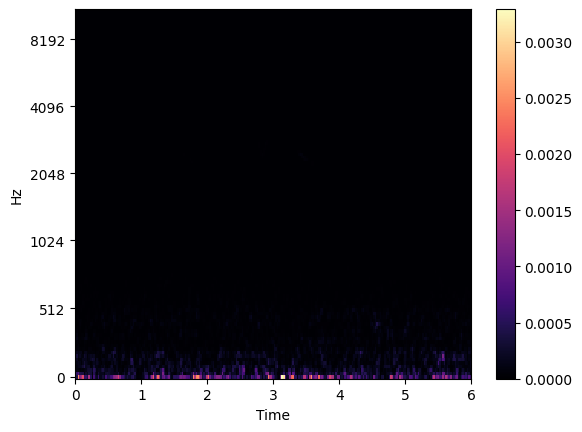

In [17]:
# 2 View the mel spectrogram before doing anything else. Try and view a spectrogram
# that contains some type of sound.
fig, ax = plt.subplots()
imag = librosa.display.specshow(S,x_axis='time',y_axis='mel', sr=downsample_rate, ax=ax,)
fig.colorbar(imag, ax=ax)

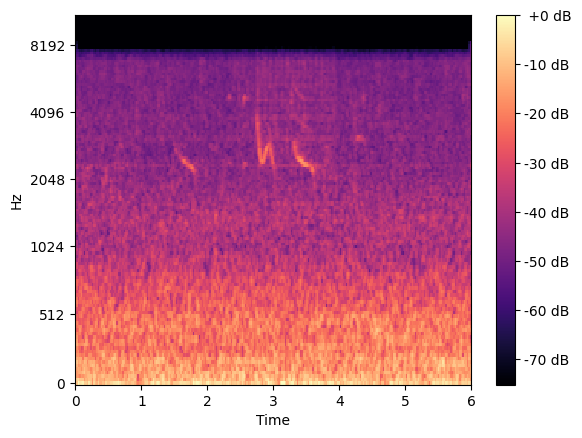

In [18]:
S_dB = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots()
imag=librosa.display.specshow(S_dB, y_axis='mel', x_axis='time', sr=downsample_rate,)
fig.colorbar(imag, ax=ax, format="%+3.0f dB")

### Task 1: preprocessing

The data in ``X`` and ``Y`` is not fully pre-processed. `X` has segments of audio which have been extracted from the audio files along with their label in `Y`.

*   Implement a function called ``audio_to_spectrogram(audio)`` which takes in one audio signal, and returns a mel-spectrogram.

*   This function should implement some type of normalisation.



In [19]:
def audio_to_spectrogram(audio):
  S = librosa.feature.melspectrogram(y=audio, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=f_min, fmax=f_max)
  S_db = librosa.power_to_db(S, ref=np.max)
  return S_db

### Task 2

*   You need to add some code which visualises 3 presence events, and 3 absence events. You are free to plot any example in ``X`` and ``Y``. But the examples should be different.

Presence events

In [ ]:
# random presence spectrogram

1 : 738


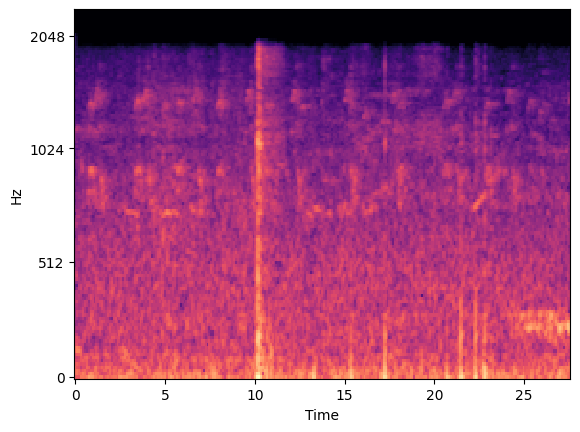

In [26]:
Y1 = np.where(Y =='1')[0]
random_index1 = random.randint(0,len(Y1)-1)
X_s = audio_to_spectrogram(X[Y1[random_index1]])
librosa.display.specshow(X_s,x_axis='time', y_axis='mel', sr=4800)
print(Y[Y1[random_index1]],':',random_index1)# TO DO

1 : 5023


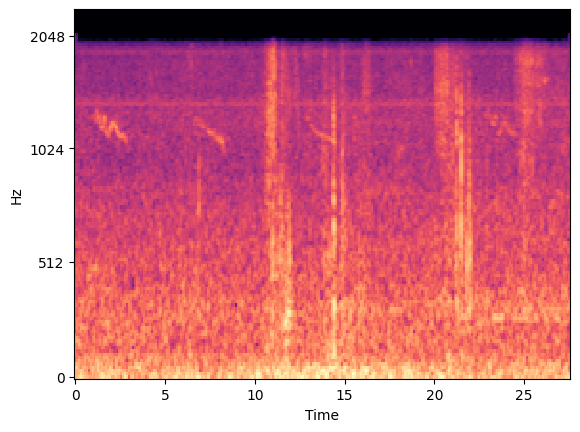

In [ ]:
Y1 = np.where(Y =='1')[0]
random_index1 = random.randint(0,len(Y1)-1)
X_s = audio_to_spectrogram(X[Y1[random_index1]])
librosa.display.specshow(X_s,x_axis='time', y_axis='mel', sr=4800)
print(Y[Y1[random_index1]],':',random_index1)# TO DO

1 : 3202


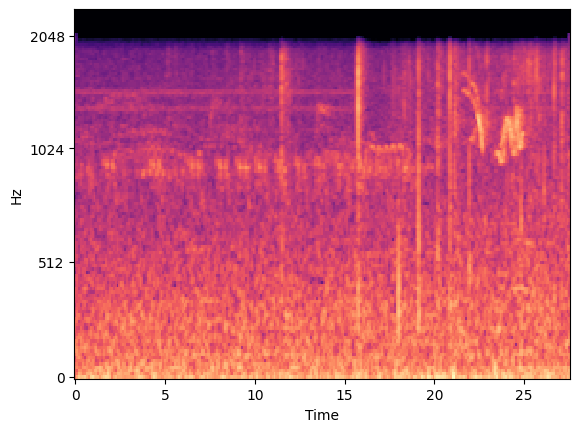

In [ ]:
Y1 = np.where(Y =='1')[0]
random_index1 = random.randint(0,len(Y1)-1)
X_s = audio_to_spectrogram(X[Y1[random_index1]])
librosa.display.specshow(X_s,x_axis='time', y_axis='mel', sr=4800)
print(Y[Y1[random_index1]],':',random_index1)# TO DO

0 : 834


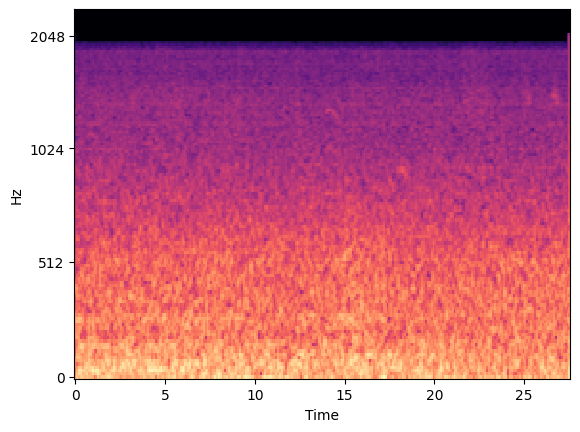

In [ ]:
Y1 = np.where(Y =='0')[0]
random_index1 = random.randint(0,len(Y1)-1)
X_s = audio_to_spectrogram(X[Y1[random_index1]])
librosa.display.specshow(X_s,x_axis='time', y_axis='mel', sr=4800)
print(Y[Y1[random_index1]],':',random_index1)# TO DO

Absence events

0 : 916


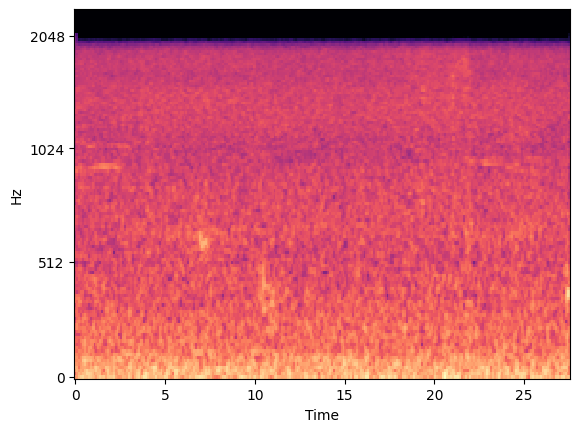

In [ ]:
Y1 = np.where(Y =='0')[0]
random_index1 = random.randint(0,len(Y1)-1)
X_s = audio_to_spectrogram(X[Y1[random_index1]])
librosa.display.specshow(X_s,x_axis='time', y_axis='mel', sr=4800)
print(Y[Y1[random_index1]],':',random_index1)# TO DO

0 : 195


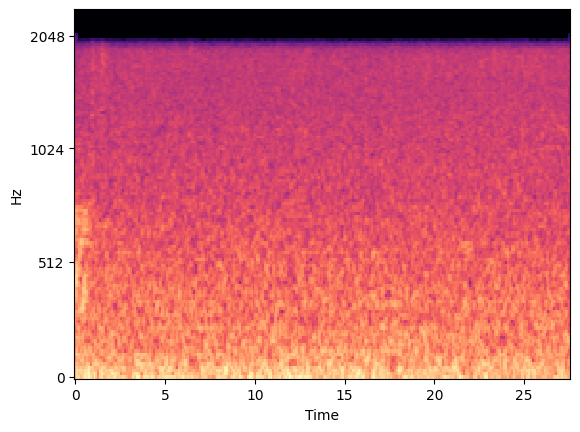

In [ ]:
Y1 = np.where(Y =='0')[0]
random_index1 = random.randint(0,len(Y1)-1)
X_s = audio_to_spectrogram(X[Y1[random_index1]])
librosa.display.specshow(X_s,x_axis='time', y_axis='mel', sr=4800)
print(Y[Y1[random_index1]],':',random_index1)# TO DO

In [20]:
#Here is a function that will convert all of your audio segments into spectrograms, using the function you wrote above.
def convert_all_to_image(segments):

  spectrograms = []
  for segment in segments:
      spectrograms.append(audio_to_spectrogram(segment))

  return np.array(spectrograms)

Create all the spectrograms

In [21]:
#Create all the spectrograms
X_S = convert_all_to_image(X)

In [30]:
X_S.shape

(1909, 128, 259)

In [31]:
#Look how many precense and absence examples are in the training data.
unique, counts = np.unique(Y, return_counts=True)
original_distribution = dict(zip(unique, counts))
print('Data distribution:',original_distribution)

Data distribution: {'0': 481, '1': 1428}


### Task 3: given the values above, how many presence examples and absence examples would you like to have? You don't have to write anything down, just reflect on this.

### Task 4:

* Implement a function that will augment one spectrogram.
* The input will be a spectrogram, and it's target.
* The output should be the modified spectogram, and the target.

This function receives one spectrogram (2D matrix).

It also receives the true target value for that spectrogram

You must implement something to change the spectrogram in some way.

You do not need to get a noisy example or any external data, do mix up or anything complicated. Only manipulate this spectrogram stored in the variable `spectrogram` in some way so that this function acts like an augmetation function.

**Here, I'm gonna use Frequency masking :**

In [32]:
def augment_one_spectrogram(spectrogram, true_target):
    # I generate a mel spectrogram
    new_spectrogram = np.copy(spectrogram)  #  I make a copy to avoid modifying the original

    # I apply frequency masking
    frequency_mask_width = np.random.randint(5, 15)  # Augmenting the range of frequency mask width
    freq = np.random.randint(10, new_spectrogram.shape[0] - frequency_mask_width - 5)  # Adjusting the range of starting index
    new_spectrogram[freq:freq + frequency_mask_width, :] = -1 # Using -1 as the replacement value

    # Return the augmented spectrogram and the target
    return new_spectrogram, true_target


**I want to make a checking of my function by choosing randomly an example**

In [33]:
Train = augment_one_spectrogram(X_S[203],true_target=0)
print("X_S[203] =",X_S[203],'\n\n','Train =',Train)

X_S[203] = [[-14.21230605 -10.10971887  -8.18760825 ...  -5.5651371  -13.96667573
  -15.39436494]
 [-16.83111643 -10.83082035  -9.7400247  ...  -4.91921544 -10.91584858
  -16.37213842]
 [-18.2384621  -10.12533755  -6.65819527 ...  -6.66925107 -12.60868316
  -12.14073141]
 ...
 [-78.00076808 -78.00076808 -78.00076808 ... -78.00076808 -78.00076808
  -78.00076808]
 [-78.00076808 -78.00076808 -78.00076808 ... -78.00076808 -78.00076808
  -78.00076808]
 [-78.00076808 -78.00076808 -78.00076808 ... -78.00076808 -78.00076808
  -78.00076808]] 

 Train = (array([[-14.21230605, -10.10971887,  -8.18760825, ...,  -5.5651371 ,
        -13.96667573, -15.39436494],
       [-16.83111643, -10.83082035,  -9.7400247 , ...,  -4.91921544,
        -10.91584858, -16.37213842],
       [-18.2384621 , -10.12533755,  -6.65819527, ...,  -6.66925107,
        -12.60868316, -12.14073141],
       ...,
       [-78.00076808, -78.00076808, -78.00076808, ..., -78.00076808,
        -78.00076808, -78.00076808],
       [-78.0

Text(0.5, 1.0, 'Frequency masking')

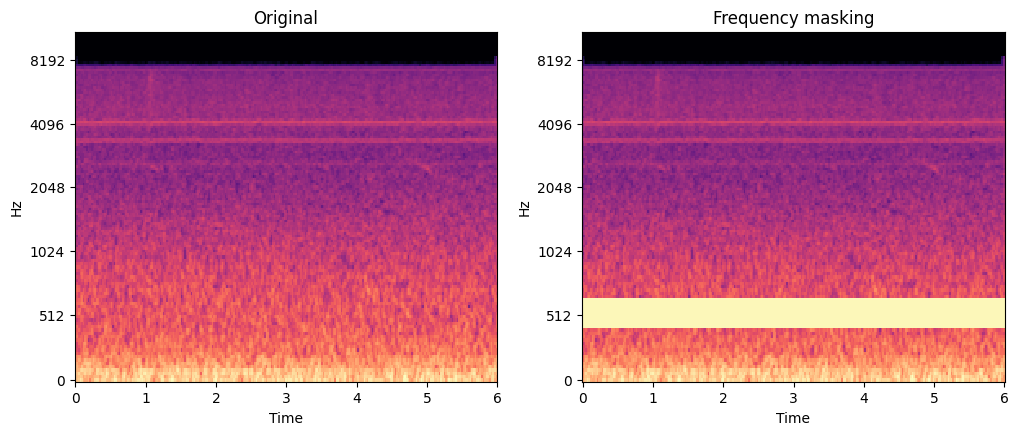

In [34]:
# Original
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
imag=librosa.display.specshow(X_S[203], y_axis='mel', x_axis='time', sr=downsample_rate,)
plt.title('Original')
# Augmentation
plt.subplot(2, 2, 2)
Train_2= Train[0]
imag=librosa.display.specshow(Train_2, y_axis='mel', x_axis='time', sr=downsample_rate)
plt.title('Frequency masking')

This function will randomly select one spectrogram which contains a presence bird call.

In [35]:
def randomly_select_presence(all_spectrograms, targets):

  # Find all the indices where there is a presence example
  presence_indices = np.where(targets =='1')[0]

  # Randomly select index
  random_index = random.randint(0,len(presence_indices)-1)

  return all_spectrograms[presence_indices[random_index]]

This function will randomly select one spectrogram which does not contain a gibbon call.

In [36]:
def randomly_select_absence(all_spectrograms, targets):

  # Find all the indices where there is a absence example
  absence_indices = np.where(targets =='0')[0]

  # Randomly select index
  random_index = random.randint(0,len(absence_indices)-1)

  return all_spectrograms[absence_indices[random_index]]

This function will generate one new spectrogram with a presence bird call in it.

In [37]:
def generate_new_presence_spectrograms(all_spectrograms, all_targets, quantity):

  new_spectrograms = []
  new_targets = []

  for i in range (0, quantity):
    presence_spectrogram = randomly_select_presence(all_spectrograms, all_targets)
    augmented_spectrogram, augmented_target = augment_one_spectrogram(presence_spectrogram,
                                                                      '1')

    new_spectrograms.append(augmented_spectrogram)
    new_targets.append(augmented_target)

  return np.asarray(new_spectrograms), np.asarray(new_targets)

This function will generate one new spectrogram without bird call in it.

In [38]:
def generate_new_absence_spectrograms(all_spectrograms, all_targets, quantity):

  new_spectrograms = []
  new_targets = []

  for i in range (0, quantity):
    absence_spectrogram = randomly_select_absence(all_spectrograms, all_targets)
    augmented_spectrogram, augmented_target = augment_one_spectrogram(absence_spectrogram,
                                                                      '0')

    new_spectrograms.append(augmented_spectrogram)
    new_targets.append(augmented_target)

  return np.asarray(new_spectrograms), np.asarray(new_targets)

### Task 5:

* Now generate actual presence calls, here you need to specify how many you want to create, extra. The value specified in the function is the amount of extra spectrograms that you want to create, which will contain gibbon calls.

In [53]:
new_presence, new_targets = generate_new_presence_spectrograms(X_S, Y, 252) # TO DO

Check the shapes of the newly created data

In [54]:
print(new_presence.shape)
print(new_targets.shape)

(252, 128, 259)
(252,)


### Task 6

Randomly select two of your newly created spectrograms, and view it.

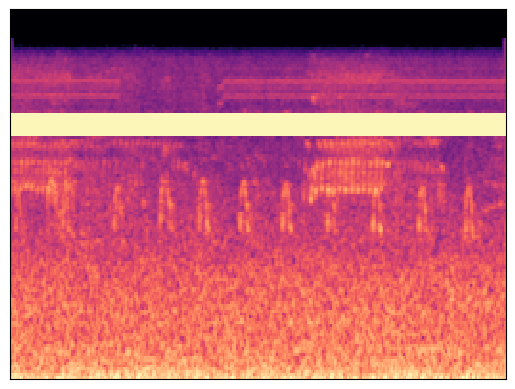

In [62]:
librosa.display.specshow(new_presence[8])

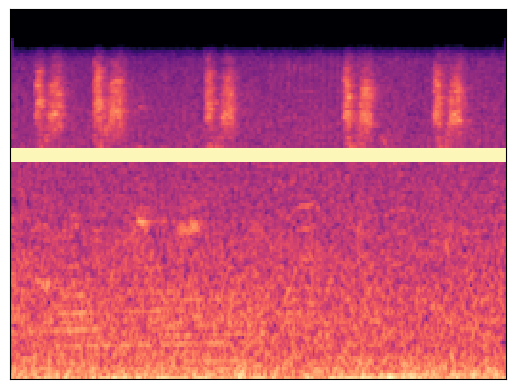

In [51]:
librosa.display.specshow(new_presence[134])# TO DO)

Now combine all of your existing spectrograms which contain bird calls, along with all of the newly created ones.

In [63]:
X_positive = np.concatenate([X_S[np.where(Y =='1')], new_presence])
X_positive = np.asarray(X_positive)
print(X_positive.shape)
Y_positive = np.concatenate([Y[np.where(Y =='1')], new_targets])
Y_positive = np.asarray(Y_positive)
print(Y_positive.shape)

(1680, 128, 259)
(1680,)


### Task 7

* Now generate actual absence spectrograms, here you need to specify how many you want to create, extra. The value specified in the function is the amount of extra spectrograms that you want to create, which will not contain gibbon calls.

In [64]:
new_absence, new_targets = generate_new_absence_spectrograms(X_S, Y, 999) # TO DO)

Check the shapes of the newly created data

In [65]:
print(new_absence.shape)
print(new_targets.shape)

(999, 128, 259)
(999,)


### Task 8

Randomly select two of your newly created spectrograms, and view it.

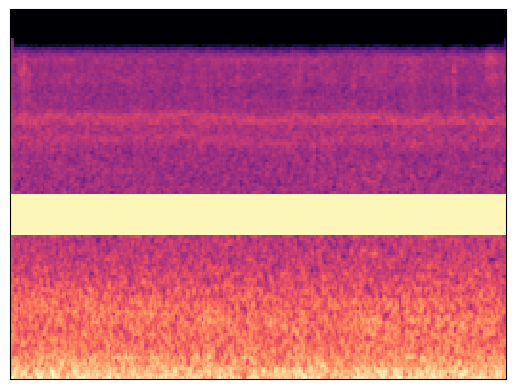

In [66]:
librosa.display.specshow(new_absence[7])# TO DO)

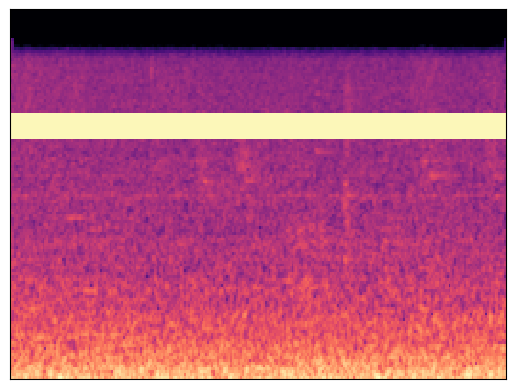

In [67]:
librosa.display.specshow(new_absence[17])# TO DO)

Now combine all of your existing spectrograms which do not contain gibbon calls, along with all of the newly created ones.

In [68]:
X_negatives = np.concatenate([X_S[np.where(Y =='0')], new_absence])
X_negatives = np.asarray(X_negatives)
print(X_negatives.shape)

Y_negatives = np.concatenate([Y[np.where(Y =='0')], new_targets])
Y_negatives = np.asarray(Y_negatives)
print(Y_negatives.shape)

(1480, 128, 259)
(1480,)


Combine all the positives features and negative features. Do the same for the targets

In [69]:
X_dataset = np.concatenate([X_positive, X_negatives])
Y_dataset = np.concatenate([Y_positive, Y_negatives])

Check the shapes of the completed dataset.

In [70]:
print(X_dataset.shape)
print(Y_dataset.shape)

(3160, 128, 259)
(3160,)


Reshape so that the data is in a format that is ready for Tensorflow.

In [71]:
X_dataset = np.expand_dims(X_dataset, axis=-1)

Check the shape again

In [72]:
print(X_dataset.shape)
print(Y_dataset.shape)

(3160, 128, 259, 1)
(3160,)


Some pre-processing to convert the categorical targets into one-hot encoded ones

In [73]:
from tensorflow.keras.utils import to_categorical
call_order = ['0','1']

# Converting categorical string labels ('presence' and 'absence) to 0s and 1s
for index, call_type in enumerate(call_order):
    Y_dataset = np.where(Y_dataset == call_type, index, Y_dataset)

Y_dataset = to_categorical(Y_dataset,
                             num_classes = 2)

Check shapes again

In [74]:
print(X_dataset.shape)
print(Y_dataset.shape)

(3160, 128, 259, 1)
(3160, 2)


Delete some RAM

In [75]:
del X_S, Y, X

In [98]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.models import Sequential

INPUT_SHAPE = (128,259, 1)
model = Sequential()

# Create one convolutional layer
model.add(Conv2D(filters = 16, kernel_size = 4, input_shape = INPUT_SHAPE, activation = 'relu'))

# Create one max pooling layer
model.add(MaxPool2D(pool_size = 2))

# Create another convolutional layer
model.add(Conv2D(filters = 32, kernel_size = 4, activation = 'relu'))

# Create another max pooling layer
model.add(MaxPool2D(pool_size=2))

# Create another convolutional layer
model.add(Conv2D(filters = 64, kernel_size = 4, activation = 'relu'))

# Create another max pooling layer
model.add(MaxPool2D(pool_size=2))

# Create another convolutional layer
model.add(Conv2D(filters = 128, kernel_size = 4, activation = 'relu'))

# Create another max pooling layer
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

# Here we create 16 fully connected units
model.add(Dense(units = 16, activation='relu'))

# The output
model.add(Dense(2, activation = 'softmax'))
#update the weights
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

### Task 9: model training

* Implement your own network and training.
* You are free to do whatever you want and show/explain your reasoning. You are free to add text or anything else you want to share.

Train the model

In [99]:
# TO DO
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 125, 256, 16)      272       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 62, 128, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 59, 125, 32)       8224      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 29, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 59, 64)        32832     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 13, 29, 64)       

In [100]:
history = model.fit(X_dataset,Y_dataset,epochs=3,
                    validation_split=0.2)

Epoch 1/3
79/79 [==============================] - 112s 1s/step - loss: 0.7481 - accuracy: 0.6630 - val_loss: 0.5593 - val_accuracy: 0.7263
Epoch 2/3
79/79 [==============================] - 110s 1s/step - loss: 0.5570 - accuracy: 0.7211 - val_loss: 0.3521 - val_accuracy: 0.8987
Epoch 3/3
79/79 [==============================] - 109s 1s/step - loss: 0.4079 - accuracy: 0.8074 - val_loss: 0.3282 - val_accuracy: 0.9051


In [97]:
#del history

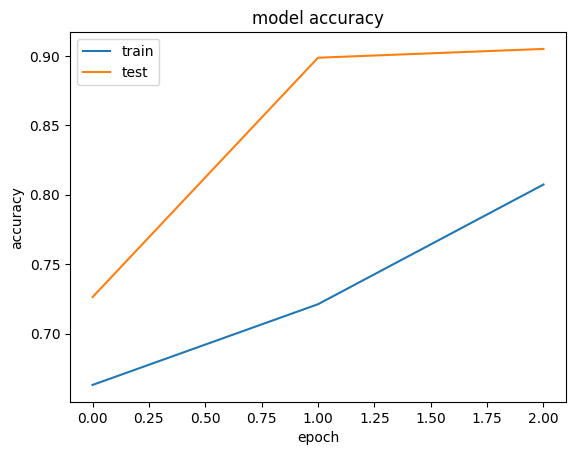

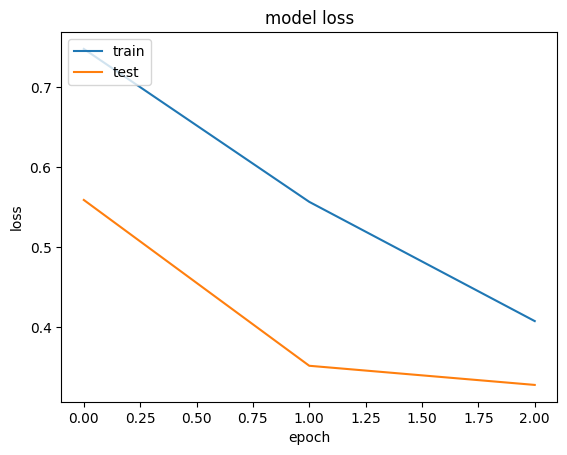

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()